In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [2]:
import numpy as np
from scipy.spatial import KDTree

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import pickle

from collections import defaultdict
from copy import deepcopy
from heapq import *

from gPRM import gPRM

In [3]:
g = open("data-4_19_20.pkl","rb")
loaded_output_file = pickle.load(g)
g.close()

In [4]:
# make a pandas dataframe for seaborn

arrays_for_dataframe = []
arrays_for_log_dataframe = []

for D in loaded_output_file.keys():
    for n in loaded_output_file[D].keys():
        for r in loaded_output_file[D][n].keys():
            for error in loaded_output_file[D][n][r]:
                arrays_for_dataframe.append([D, n, r, error])
                arrays_for_log_dataframe.append([D, n, r, -1* np.log(error)])
                
df = pd.DataFrame(arrays_for_dataframe)
df.columns = ['D', 'n', 'r', 'relative_error']

log_df = pd.DataFrame(arrays_for_log_dataframe)
log_df.columns = ['D', 'n', 'r', 'log_relative_error']

In [5]:
# Statistics

statistics = {}

for D in [2,3,4]:
    for n in [100, 1000, 10000]:
        for r in [1,2,3]:
            statistics[(D,n,r)] = log_df.loc[log_df['r'] == r].loc[log_df['n'] == n].loc[log_df['D'] == D]['log_relative_error'].describe()
            

In [60]:
statistics[(4,100,1)]

count    49.000000
mean      1.747735
std       0.371534
min       1.168821
25%       1.463079
50%       1.730426
75%       1.992034
max       2.964067
Name: log_relative_error, dtype: float64

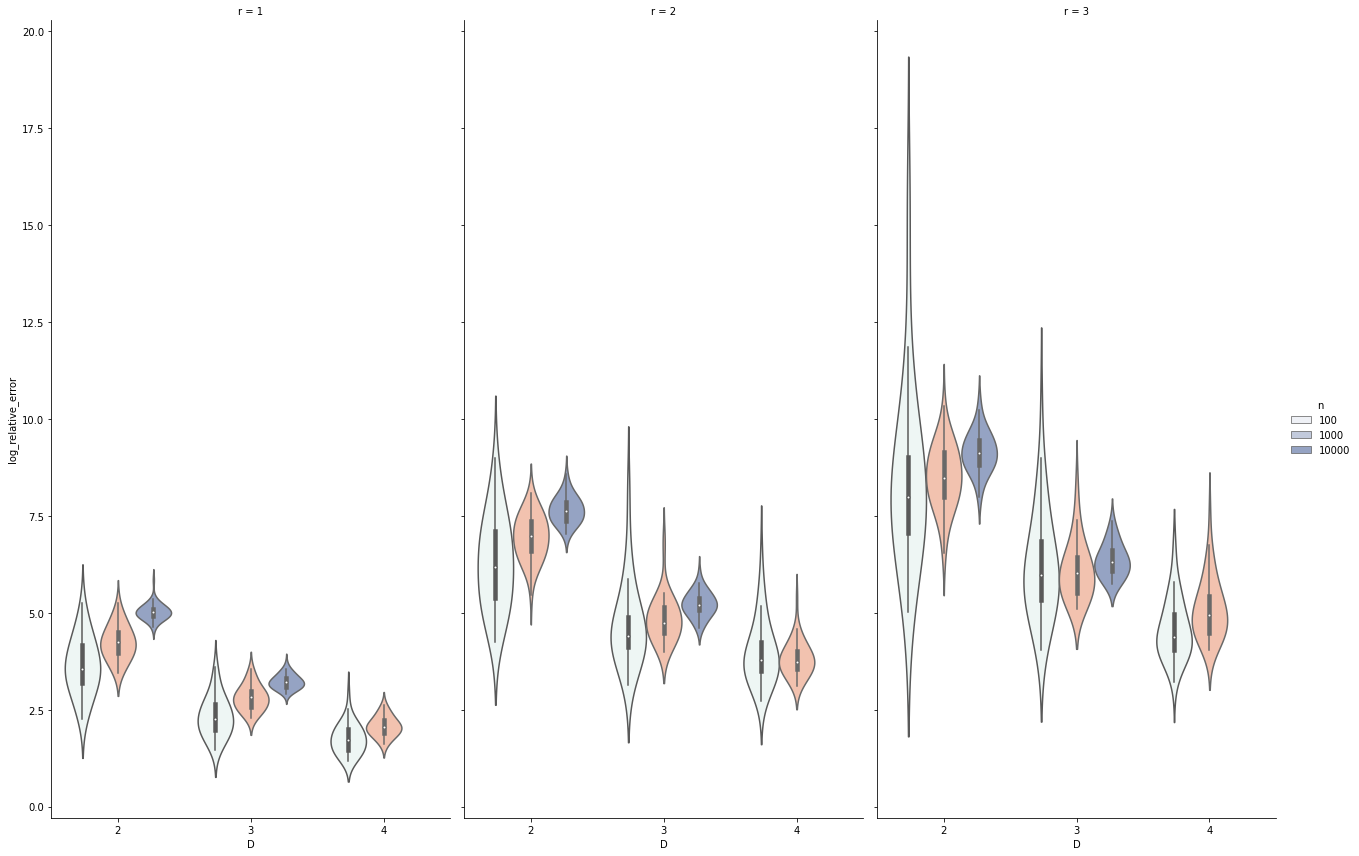

In [23]:
log_plot = sns.FacetGrid(log_df, col='r', hue='n', palette='Set2', height=12, aspect=0.5, legend_out=True)
log_plot.map(sns.violinplot, 'D', 'log_relative_error', hue=log_df['n'], bw=0.7, order=[2,3,4])
#log_plot.map(sns.pointplot, 'D', 'log_relative_error', err_width=1)
log_plot.add_legend()

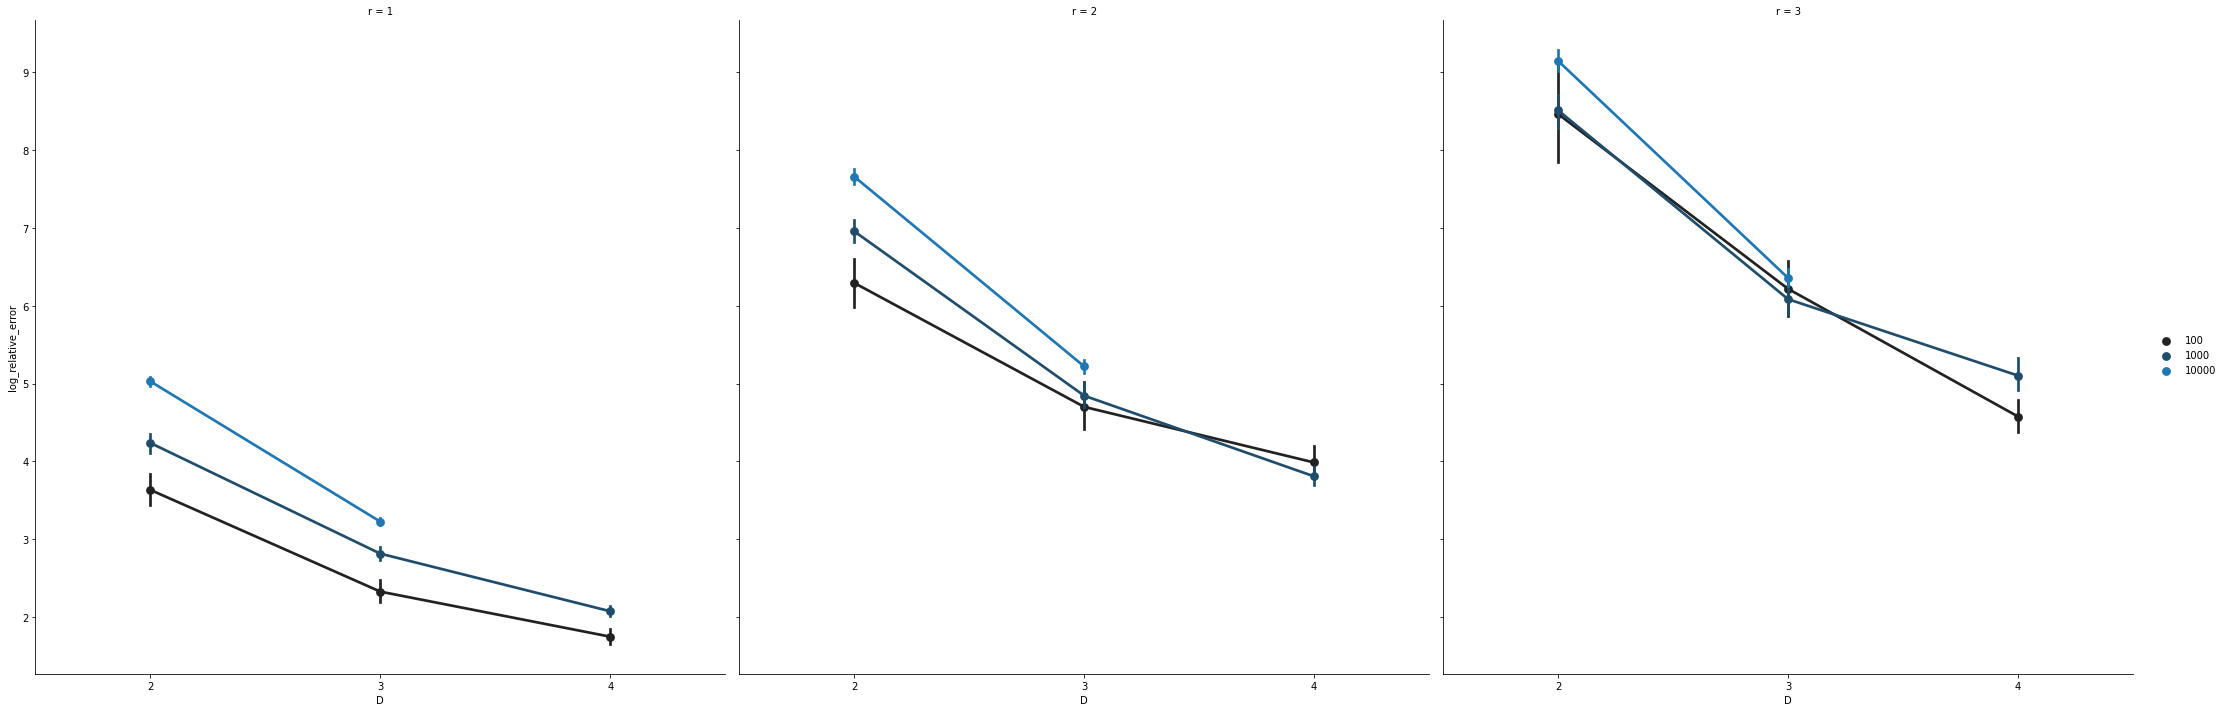

In [46]:
# treating -log(X) as the r.v. in interest

log_plot = sns.FacetGrid(log_df, col='r', palette='Set1', height=10, aspect=1, legend_out=True)
log_plot.map(sns.pointplot, 'D', 'log_relative_error', hue=log_df['n'], err_width=0.5, order=[2,3,4])
log_plot.add_legend()

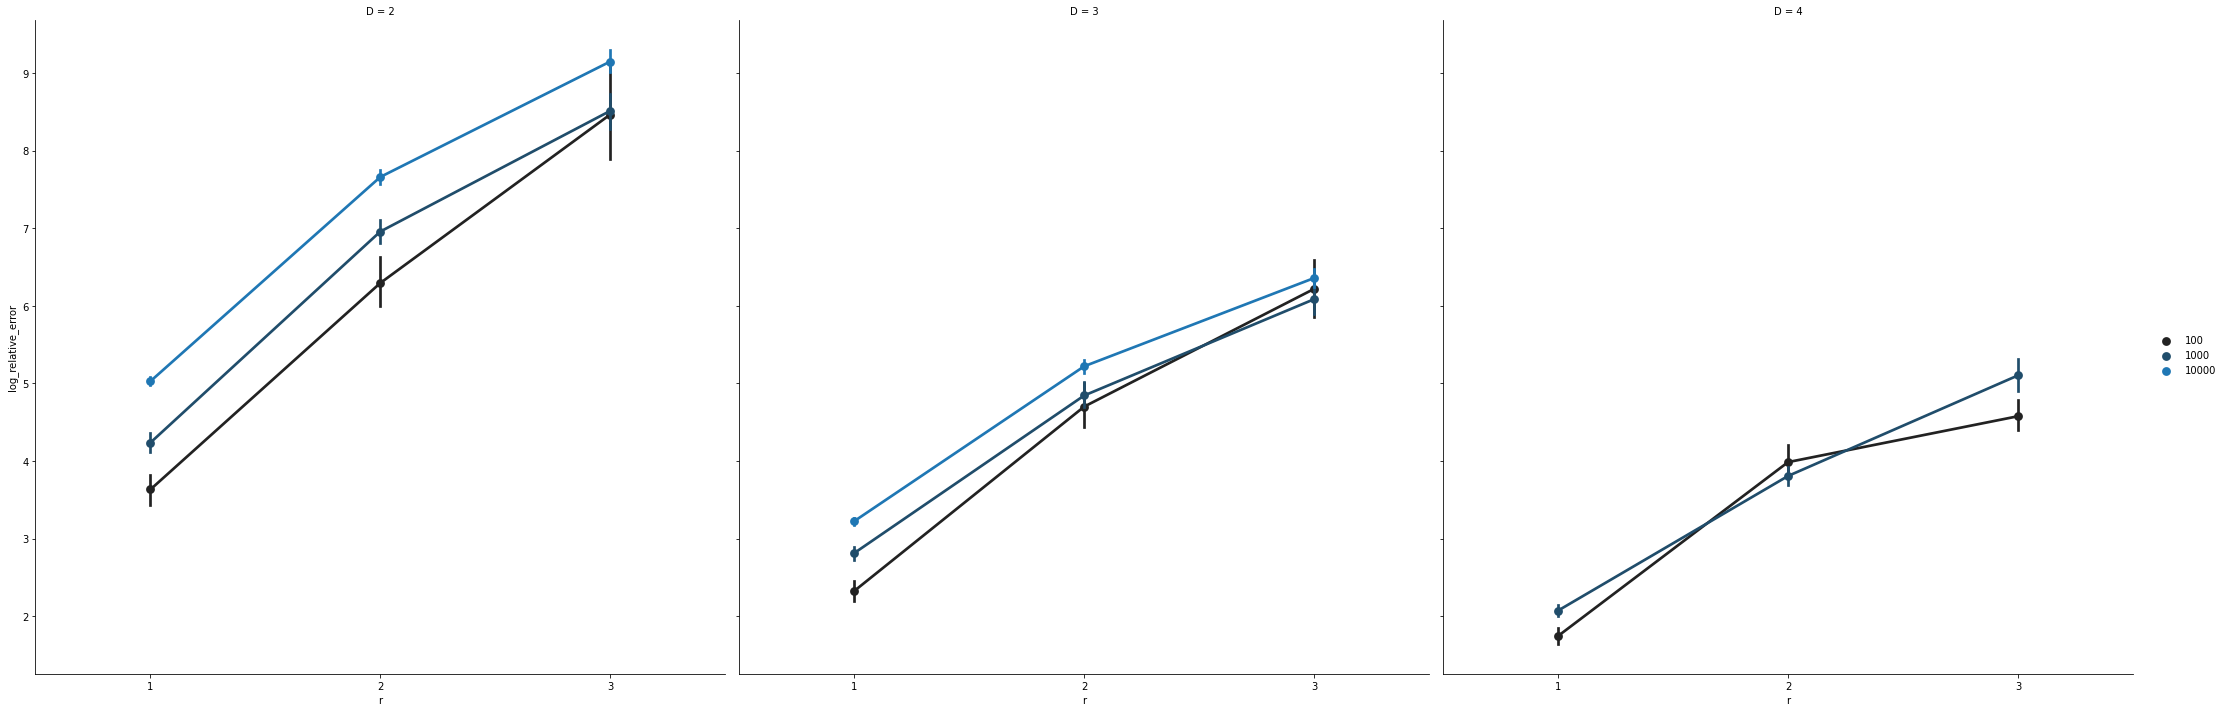

In [41]:
log_plot = sns.FacetGrid(log_df, col='D', height=10, aspect=1, legend_out=True)
log_plot.map(sns.pointplot, 'r', 'log_relative_error', hue=log_df['n'], err_width=0.5, order=[1,2,3])
log_plot.add_legend()

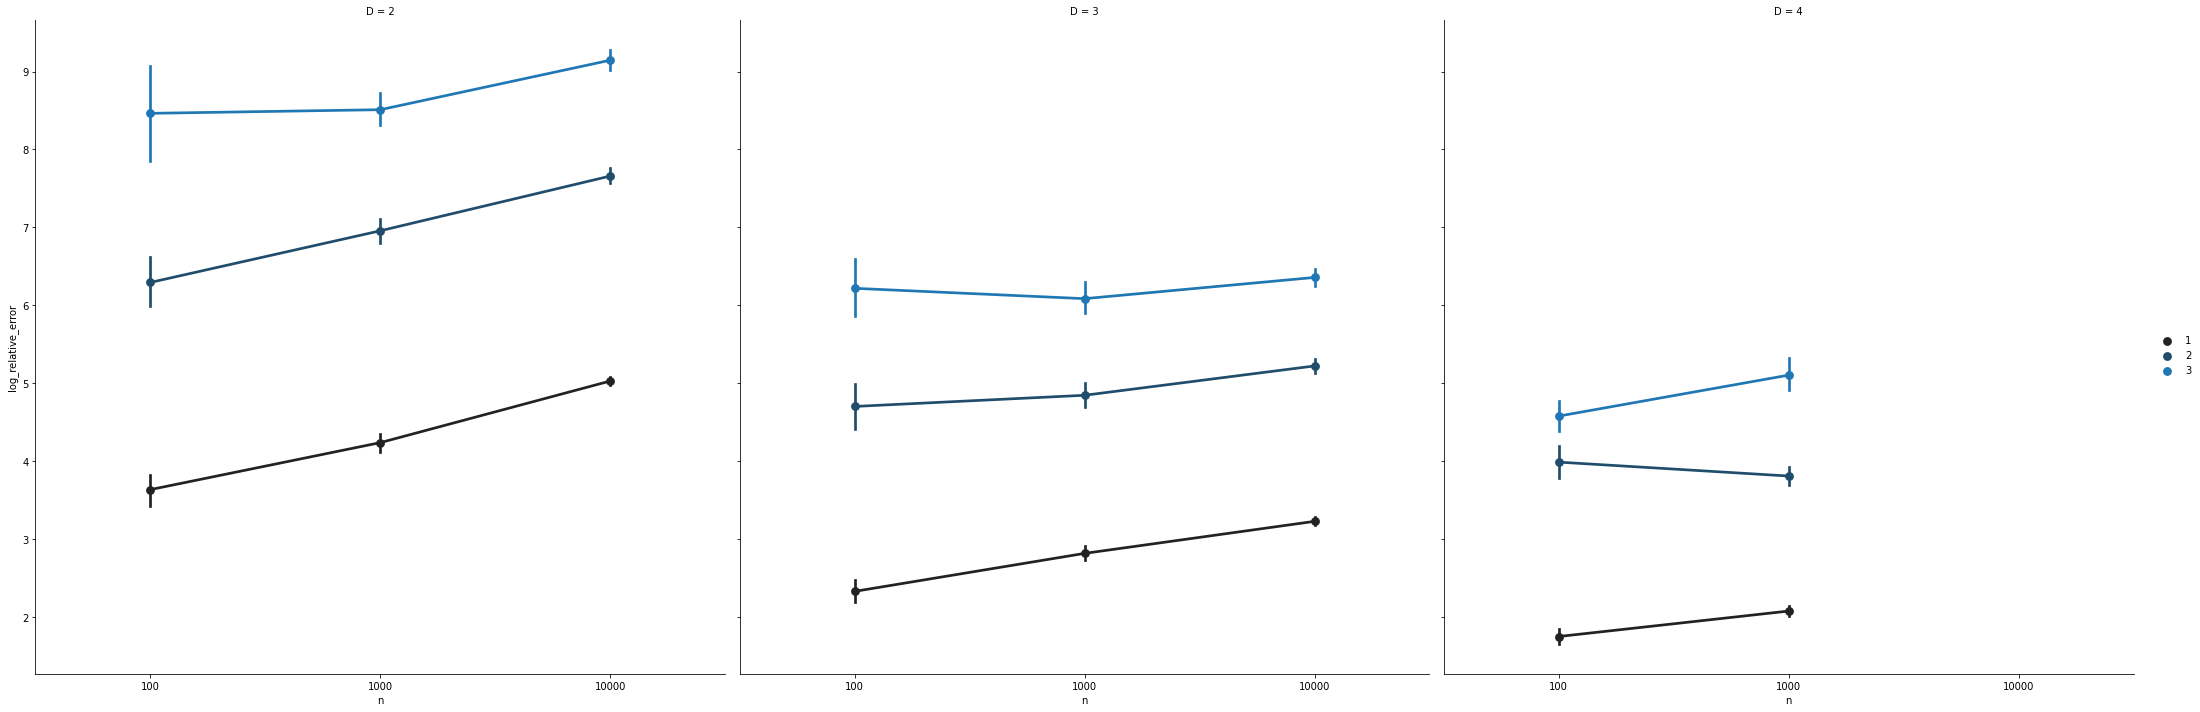

In [42]:
log_plot = sns.FacetGrid(log_df, col='D', height=10, aspect=1, legend_out=True)
log_plot.map(sns.pointplot, 'n', 'log_relative_error', hue=log_df['r'], err_width=0.5, order=[100, 1000, 10000])
log_plot.add_legend()

In [53]:
log_df_1 = log_df[log_df['r'] == 1]
log_df_2 = log_df[log_df['r'] == 2]
log_df_3 = log_df[log_df['r'] == 3]

In [55]:
log_df_1

,D,n,r,log_relative_error
0,2,100,1,3.217260
1,2,100,1,5.253448
2,2,100,1,3.398890
3,2,100,1,2.910962
4,2,100,1,4.295474
...,...,...,...,...
1094,4,1000,1,2.388557
1095,4,1000,1,2.255551
1096,4,1000,1,2.044379
1097,4,1000,1,2.604946


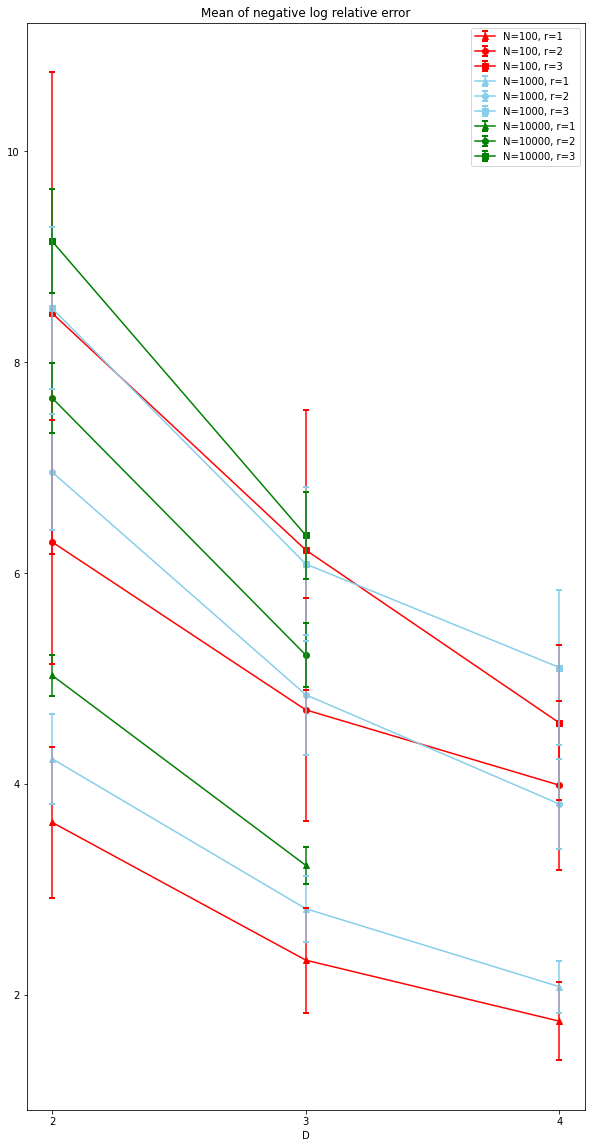

In [86]:
plt.figure(figsize=(10, 20))

X = [2,3,4]
plt.xticks(X)

markers = {1: '^', 2: 'o', 3: 's'}       # different markers for different r
colors = {100: 'red', 1000: 'skyblue', 10000: 'green'}        # different colors for different n

for N in [100, 1000, 10000]:
    for r in [1, 2, 3]:
        # for n, r combo, plot for each D in X
        y = [statistics[(2, N,r)]['mean'], statistics[(3, N,r)]['mean'], statistics[(4, N,r)]['mean']]
        e = [statistics[(2, N,r)]['std'], statistics[(3, N,r)]['std'], statistics[(4, N,r)]['std']]
        line = plt.errorbar(X, y, e, linestyle='-', marker=markers[r], color=colors[N], barsabove=True, capsize=3, capthick=2)
        line.set_label('N='+str(N)+', r='+str(r))
plt.legend()
plt.title("Mean of negative log relative error")
plt.xlabel("D")
plt.show()

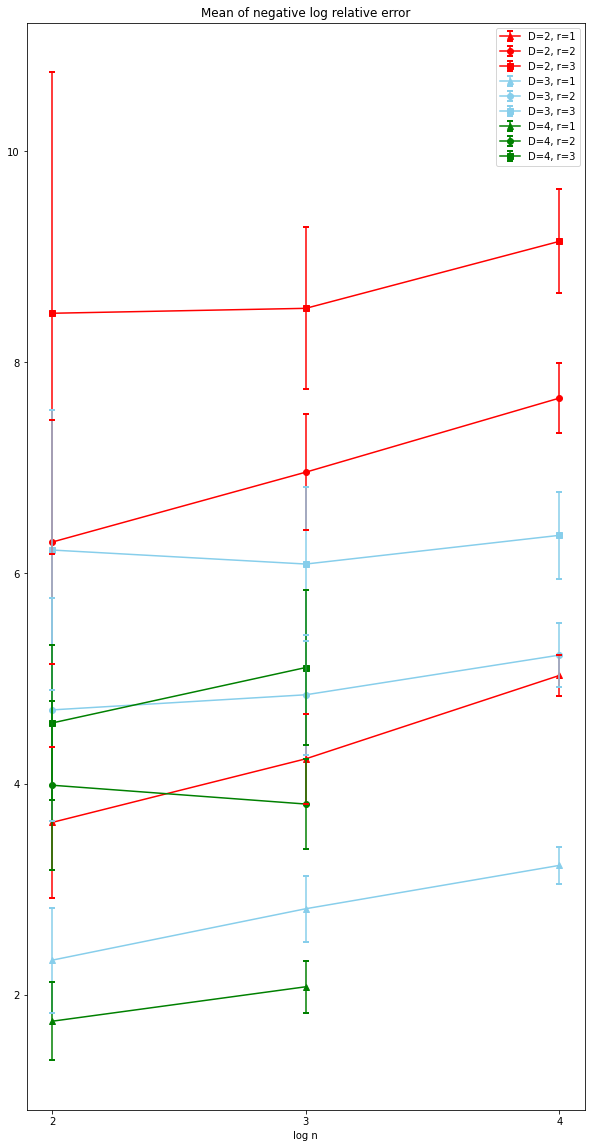

In [85]:
plt.figure(figsize=(10, 20))

X = [2,3,4]
plt.xticks(X)

markers = {1: '^', 2: 'o', 3: 's'}       # different markers for different r
colors = {2: 'red', 3: 'skyblue', 4: 'green'}        # different colors for different D

for D in [2, 3, 4]:
    for r in [1, 2, 3]:
        # for n, r combo, plot for each D in X
        y = [statistics[(D, 100,r)]['mean'], statistics[(D, 1000,r)]['mean'], statistics[(D, 10000,r)]['mean']]
        e = [statistics[(D, 100,r)]['std'], statistics[(D, 1000,r)]['std'], statistics[(D, 10000,r)]['std']]
        line = plt.errorbar(X, y, e, linestyle='-', marker=markers[r], color=colors[D], barsabove=True, capsize=3, capthick=2)
        line.set_label('D='+str(D)+', r='+str(r))
plt.legend()
plt.title("Mean of negative log relative error")
plt.xlabel("log n")
plt.show()

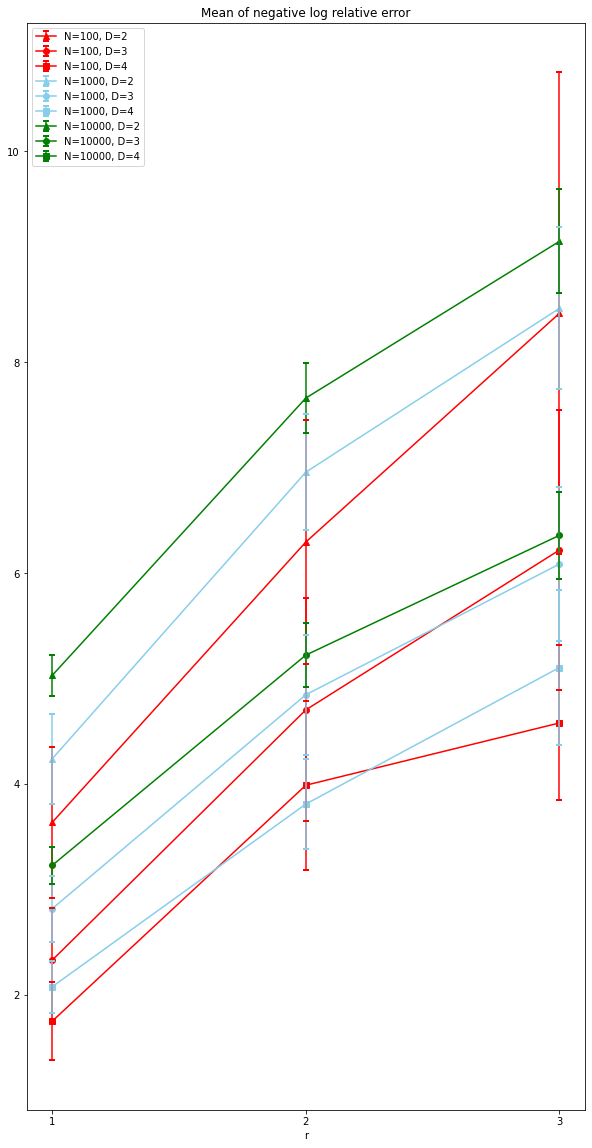

In [88]:
plt.figure(figsize=(10, 20))

X = [1, 2, 3]
plt.xticks(X)

markers = {2: '^', 3: 'o', 4: 's'}       # different markers for different D
colors = {100: 'red', 1000: 'skyblue', 10000: 'green'}        # different colors for different n

for N in [100, 1000, 10000]:
    for D in [2 ,3 , 4]:
        # for n, r combo, plot for each D in X
        y = [statistics[(D, N,1)]['mean'], statistics[(D, N,2)]['mean'], statistics[(D, N,3)]['mean']]
        e = [statistics[(D, N,1)]['std'], statistics[(D, N,2)]['std'], statistics[(D, N,3)]['std']]
        line = plt.errorbar(X, y, e, linestyle='-', marker=markers[D], color=colors[N], barsabove=True, capsize=3, capthick=2)
        line.set_label('N='+str(N)+', D='+str(D))
plt.legend()
plt.title("Mean of negative log relative error")
plt.xlabel("r")
plt.show()